<a href="https://colab.research.google.com/github/trantuan4132/Steganography/blob/main/Image_Steganography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Import library

In [ ]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# II. Utility functions

In [ ]:
def message_to_binary(message):
    return ''.join([format(ord(i), "08b") for i in message])

def integer_to_binary(integer):
    return format(integer, "08b")

def binary_to_string(binary_message, delimiter=''):
    message = ""
    for i in range(0, len(binary_message), 8):
        byte = binary_message[i:i+8]
        message += chr(int(byte, 2))
        if message[-len(delimiter):] == delimiter:   # reached the delimiter
            return message[:-len(delimiter)]
    return message

# III. Image steganography algorithm

## Least Significant Bit (LSB)

In [ ]:
class LSB():
    def __init__(self, delimiter="#####", key=2022):
        self.delimiter = delimiter
        self.key = key

    def embed_image(self, image, message):
        message = message + self.delimiter
        binary_message = message_to_binary(message)
        h, w, c = image.shape
        max_bits = h * w * c

        # Check if message length exceeds maximum bits for encoding
        if len(binary_message) > max_bits:
            raise ValueError("Encountered insufficient places to store data, need bigger image or less data !!")

        # Create path for embedding data using key value
        path = np.arange(max_bits)
        np.random.seed(self.key)
        np.random.shuffle(path)

        # Embed all data from message within the image
        new_image = image.copy()
        for i in range(len(binary_message)):
            index = path[i]
            
            # Index to image coordination
            z = index % c
            x = (index // c) % w
            y = (index // c) // w

            # Embed data within the last bit of the current coordination value
            binary_value = integer_to_binary(image[y][x][z])
            new_image[y][x][z] = int(binary_value[:-1] + binary_message[i], 2)

        return new_image

    def extract(self, image):
        h, w, c = image.shape
        max_bits = h * w * c

        # Create path for decoding data using key value
        path = np.arange(max_bits)
        np.random.seed(self.key)
        np.random.shuffle(path)

        # Decode all data from the image
        binary_message = ''
        for i in range(len(path)):
            index = path[i]
            
            # Index to image coordination
            z = index % c
            x = (index // c) % w
            y = (index // c) // w

            # Decode the data within the last bit of the current coordination value
            binary_message += integer_to_binary(image[y][x][z])[-1]

        message = binary_to_string(binary_message, delimiter=self.delimiter)    
        return message

# IV. Demo

## *1. Normal demo*

(332, 332, 3)


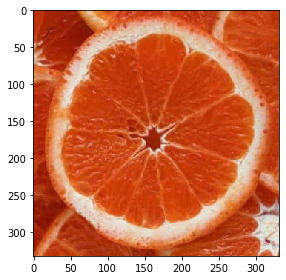

In [ ]:
image = io.imread('https://interactive-examples.mdn.mozilla.net/media/cc0-images/grapefruit-slice-332-332.jpg')
print(image.shape)
io.imshow(image)

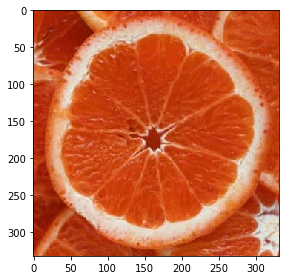

In [ ]:
lsb = LSB(key=42)
new_image = lsb.embed_image(image, message="Hello World")
io.imshow(new_image)

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


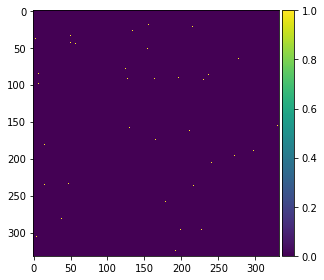

In [ ]:
# print((image != new_image).all(axis=-1))
# io.imshow((image != new_image).any(axis=-1) * 255)
io.imshow((image != new_image).sum(axis=-1))

In [ ]:
lsb.extract(new_image)

'Hello World'

## *2. Demo using form*

(332, 332, 3)


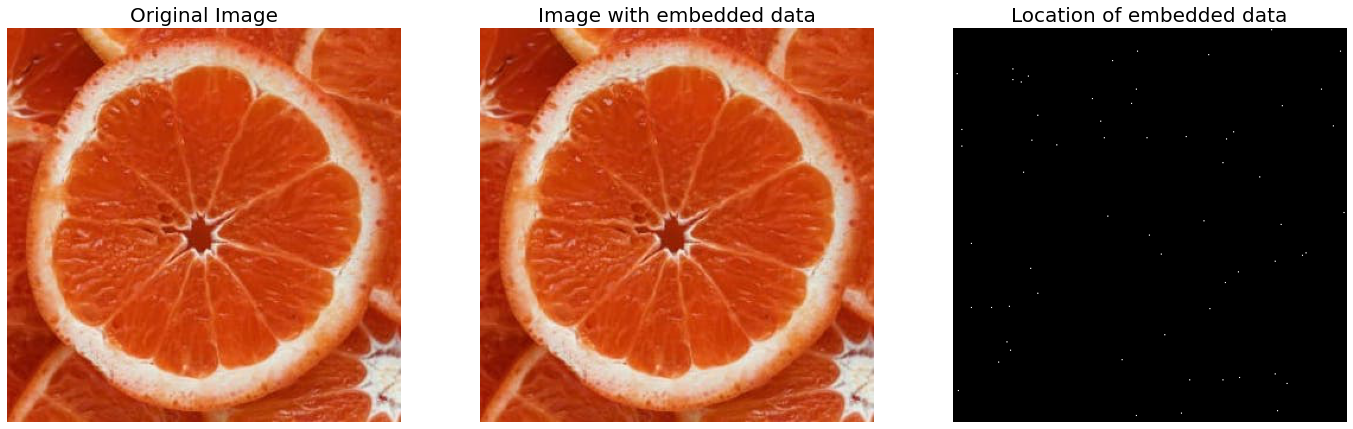

In [ ]:
#@title ## **Hiding text within the image** {display-mode: "form"}

#@markdown ---
#@markdown ### *Enter image path:*
image_path = 'https://interactive-examples.mdn.mozilla.net/media/cc0-images/grapefruit-slice-332-332.jpg' #@param {type:"string"}
#@markdown ### *Enter message:*
message = 'Hello World' #@param {type:"string"}
#@markdown ### *Select algorithm:*
algorithm_name = 'LSB' #@param ["LSB"]
#@markdown ### *Enter key:*
key = 42 #@param {type:"integer"}
#@markdown ### *Enter output path to save image:*
output_path = "new_image.png" #@param {type:"string"}
#@markdown **Note: Output path to save image should use extension with 
#@markdown lossless compression (.png) to ensure that no information is lost**

# Read image
image = io.imread(image_path)
print(image.shape)

# Initialize algorithm for image steganography
algorithm = eval(f'{algorithm_name}(key={key})')

# Embed message within the image
new_image = algorithm.embed_image(image, message)
io.imsave('new_image.png', new_image)

# Plot the original image and image with embedded data
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
axes[0].set_title('Original Image', fontsize=20)
axes[0].imshow(image)
axes[0].axis('off')
axes[1].set_title('Image with embedded data', fontsize=20)
axes[1].imshow(new_image)
axes[1].axis('off')
axes[2].set_title('Location of embedded data', fontsize=20)
axes[2].imshow((image != new_image).sum(axis=-1), cmap='gray')
axes[2].axis('off')
plt.show()

In [ ]:
#@title ## **Extract message within the image** {display-mode: "form"}

#@markdown ---
#@markdown ### *Enter image to extract:*
image_path = 'new_image.png' #@param {type:"string"}
#@markdown ### *Select algorithm:*
algorithm_name = 'LSB' #@param ["LSB"]
#@markdown ### *Enter key:*
key = 42 #@param {type:"integer"}

# Read image
image_to_extract = io.imread(image_path)
print(image_to_extract.shape)

# Initialize algorithm for image steganography
algorithm = eval(f'{algorithm_name}(key={key})')

# Extract message
extracted_message = algorithm.extract(image_to_extract)
print(extracted_message)

(332, 332, 3)
Hello World


In [ ]:
# (image_to_extract==new_image).all(axis=-1)
image_to_extract[0,0], new_image[0,0]

(array([190,  48,  10], dtype=uint8), array([186,  47,   6], dtype=uint8))